1. Exploratory data analysis

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np

,YearsExperience,Salary
count,50.000000,50.00000
mean,9.480000,77370.54740
std,5.485491,28298.92442
min,1.400000,33048.80000
25%,4.500000,53861.88000
50%,9.300000,78598.65000
75%,13.350000,95356.22500
max,19.400000,140646.44000


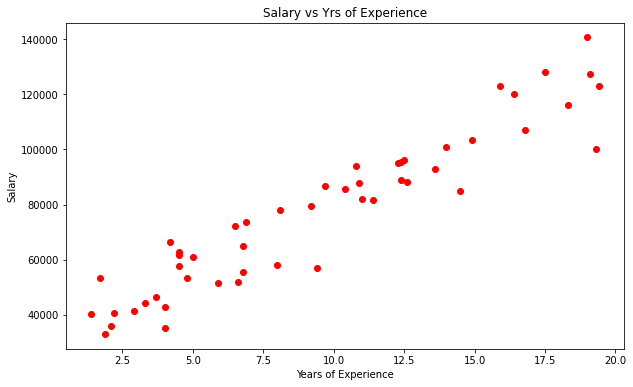

In [82]:
data = pd.read_csv("C:/Users/aarya/Documents/Python/extended_salary_data.csv")

salary = data['Salary']
years = data['YearsExperience']

plt.figure(figsize=(10,6))
plt.scatter(years, salary, color='red')
plt.title('Salary vs Yrs of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

data.describe()

2. Build A linear regression model

In [83]:
x = years
y = salary
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [84]:
cute_model = LinearRegression()
cute_model.fit(x_train, y_train)
m = cute_model.coef_
c = cute_model.intercept_
print("Slope: ", m)
print("Intercept: ", c)

Slope:  [[4784.49600662]]
Intercept:  [31348.86410637]


3. Evaluate the model

In [85]:
#enter the no. of years of experience and you get the salary prediction
yr = 10
cute_model.predict([[yr]])

array([[79193.82417262]])

In [86]:
print("MSE: ",sklearn.metrics.mean_squared_error(y_test, cute_model.predict(x_test)))
print("MAE: ", sklearn.metrics.mean_absolute_error(y_test, cute_model.predict(x_test)))

MSE:  49707663.92901924
MAE:  6120.988640486035


Text(0, 0.5, 'Salary')

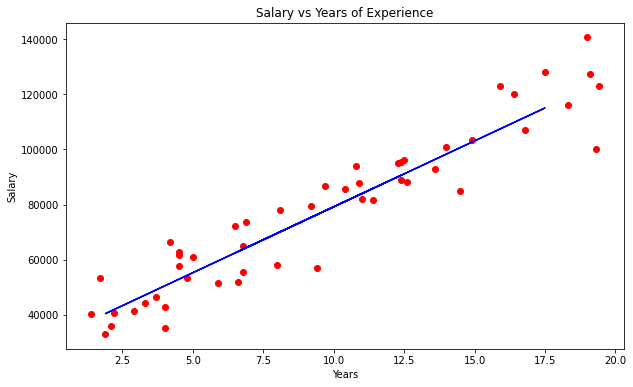

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red')
plt.plot(x_test, cute_model.predict(x_test), color='blue')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years')
plt.ylabel('Salary')

BONUS TASK

In [88]:
max_salary=data.loc[:,'Salary'].max()
max_salary

140646.44

In [89]:
data.loc[:, 'NumProjectsCompleted'] =[ int(i) for i in data.loc[:, 'YearsExperience']*1.2 + (data.loc[:, 'Salary'] / max_salary)*3 +(6*np.random.random((len(data),))-3)]
data.head()

,YearsExperience,Salary,NumProjectsCompleted
0,8.1,77884.67,13
1,19.1,127213.68,26
2,14.9,103343.52,18
3,12.4,88988.96,15
4,4.0,35214.78,3


In [90]:
X = data[['YearsExperience', 'NumProjectsCompleted']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cute_model_2 = LinearRegression()
cute_model_2.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = cute_model_2.predict(X_test)
print("MSE: ",sklearn.metrics.mean_squared_error(y_test, y_pred))
print("MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_pred))

MSE:  78534966.77755627
MAE:  7098.261242139209


In [ ]:
#Prediciton for someone with 10 years of experience and 20 projects completed
cute_model_2.predict([[10,20]])

#seeing the result ~90k we can see that this is higher than 79k predicted by
#cute model (which only takes years of experience into account)...hence we can
#see that the new model can take more factors into account

#moreover if we see the dataset, people with experience 10.4-10.9yrs are paid
#around 90k (85-94k)

array([90851.38945718])